# Unlocking Customer Potential: A Data-Driven Segmentation Strategy


## Introduction
In today's digital age, e-commerce has transformed the global retail industry (Forbes). Understanding customer behavior and preferences is crucial for businesses to thrive in this competitive landscape. This project aims to analyze a dataset containing retail transactions to gain valuable insights into customer behavior. By segmenting customers we can understand what is our customers needs and improve our performance.

The specific objectives of this project are:
1. Exploratory Data Analysis (EDA): To understand the dataset's characteristics, identify missing values, and visualize key trends.
2. Customer Segmentation: To group customers based on their purchasing behavior and identify high-value segments.
3. Product Analysis: To analyze product performance, identify popular categories, and uncover cross-selling opportunities.

## Data Overview
The data we currently used is Coffee Beans sales data from 2019 - 2022, including customer, sales, and product data. This data has been uploaded on the Kaggle website by the owner, Saad Haroon. You can visit <a href="https://www.kaggle.com/datasets/saadharoon27/coffee-bean-sales-raw-dataset?resource=download">this link</a> to view the data from the original source.



## Summary findings
* The business has a very low repeat rate (6%) and a very high churn rate (94%)
* More than 70% of customers are from US.
* 51% of customers are not joining in loyalty program 
* Sales trend in weekend the business generates significantly more than weekdays. And in the beginning and end of the year, the business generates significantly more than mid-year.
* Most profit: dark roast ed liberica 2.5kg
* Most revenue: light roasted arabica 2.5kg
* Most unit sold: light roasted robusta 0.2kg



## Data Exploration


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.colors import LinearSegmentedColormap
from datetime import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [53]:
data_path = "Raw Data.xlsx"
df_customer = pd.read_excel(data_path, sheet_name="customers")
df_order = pd.read_excel(data_path, sheet_name="orders")
df_product = pd.read_excel(data_path, sheet_name="products")


In [54]:
df_customer.head()


,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [55]:
df_order.head()


,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_product.head()


,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [57]:
customer_null = df_customer.isna().sum()
order_null = df_order.isna().sum()
product_null = df_product.isna().sum()


In [58]:
print(f"null values in customer data \n {customer_null}")


null values in customer data 
 Customer ID         0
Customer Name       0
Email             204
Phone Number      130
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
dtype: int64


In [59]:
print(f"null values in order data \n {order_null}")


null values in order data 
 Order ID            0
Order Date          0
Customer ID         0
Product ID          0
Quantity            0
Customer Name    1000
Email            1000
Country          1000
Coffee Type      1000
Roast Type       1000
Size             1000
Unit Price       1000
Sales            1000
dtype: int64


In [60]:
print(f"null values in product data \n {product_null}")


null values in product data 
 Product ID        0
Coffee Type       0
Roast Type        0
Size              0
Unit Price        0
Price per 100g    0
Profit            0
dtype: int64


* The first letter of each word in column names are capitalized. To make it easier to code, we need to make them in lowercase.
* In the order data, there are several columns that are not needed and can be accessed by combining them with other data tables, The columns need to be removed.
* In the product data, the sizes of products are in Kg.

In [61]:
# manipulate column names to lowercase
df_customer.columns = df_customer.columns.str.lower()
df_order.columns = df_order.columns.str.lower()
df_product.columns = df_product.columns.str.lower()

# remove unnecessary columns
remove_order_cols = ["customer name", "email", 
                     "country", "coffee type", 
                     "roast type", "size", 
                     "unit price", "sales"]
df_order = df_order.drop(columns=remove_order_cols)


df_product.columns = df_product.columns.str.replace("size", "size kg")
# assuming the unit price has covered all cost
df_product["cost"] = df_product["unit price"] - df_product["profit"]


In [62]:
df_order = df_order.merge(df_customer[["customer id", "customer name", "city", "country", "loyalty card"]], 
                          on="customer id",
                          how="left")
df_order = df_order.merge(df_product.drop("price per 100g", axis=1), 
                          on="product id",
                          how="left")

df_order.columns = df_order.columns.str.replace("profit", "profit per unit")
df_order["total price"] = df_order["quantity"] * df_order["unit price"]
df_order["total profit"] = df_order["quantity"] * df_order["profit per unit"]
df_order["cost"] = df_order["cost"] * df_order["quantity"]

df_order["order day"] = df_order["order date"].map(lambda x: datetime.strftime(x, format="%a"))
day_order = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
df_order["order day"] = pd.Categorical(df_order["order day"], categories=day_order, ordered=True)

df_order["order month"] = df_order["order date"].map(lambda x: datetime.strftime(x, format="%b"))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_order['order month'] = pd.Categorical(df_order['order month'], categories=month_order, ordered=True)

df_order["order year"] = df_order["order date"].map(lambda x: datetime.strftime(x, format="%Y"))

df_order.head()


,order id,order date,customer id,product id,quantity,customer name,city,country,loyalty card,coffee type,roast type,size kg,unit price,profit per unit,cost,total price,total profit,order day,order month,order year
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,Aloisia Allner,Paterson,United States,Yes,Rob,M,1.0,9.950,0.5970,18.7060,19.90,1.1940,Thu,Sep,2019
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,Aloisia Allner,Paterson,United States,Yes,Exc,M,0.5,8.250,0.9075,36.7125,41.25,4.5375,Thu,Sep,2019
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Jami Redholes,San Antonio,United States,Yes,Ara,L,1.0,12.950,1.1655,11.7845,12.95,1.1655,Thu,Jun,2021
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Christoffer O' Shea,Cill Airne,Ireland,No,Exc,M,1.0,13.750,1.5125,24.4750,27.50,3.0250,Thu,Jul,2021
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Christoffer O' Shea,Cill Airne,Ireland,No,Rob,L,2.5,27.485,1.6491,51.6718,54.97,3.2982,Thu,Jul,2021


In [63]:
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer id     1000 non-null   object
 1   customer name   1000 non-null   object
 2   email           796 non-null    object
 3   phone number    870 non-null    object
 4   address line 1  1000 non-null   object
 5   city            1000 non-null   object
 6   country         1000 non-null   object
 7   postcode        1000 non-null   object
 8   loyalty card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [64]:
df_order.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order id         1000 non-null   object        
 1   order date       1000 non-null   datetime64[ns]
 2   customer id      1000 non-null   object        
 3   product id       1000 non-null   object        
 4   quantity         1000 non-null   int64         
 5   customer name    1000 non-null   object        
 6   city             1000 non-null   object        
 7   country          1000 non-null   object        
 8   loyalty card     1000 non-null   object        
 9   coffee type      1000 non-null   object        
 10  roast type       1000 non-null   object        
 11  size kg          1000 non-null   float64       
 12  unit price       1000 non-null   float64       
 13  profit per unit  1000 non-null   float64       
 14  cost             1000 non-null   float64 

In [65]:
df_product.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product id      48 non-null     object 
 1   coffee type     48 non-null     object 
 2   roast type      48 non-null     object 
 3   size kg         48 non-null     float64
 4   unit price      48 non-null     float64
 5   price per 100g  48 non-null     float64
 6   profit          48 non-null     float64
 7   cost            48 non-null     float64
dtypes: float64(5), object(3)
memory usage: 3.1+ KB


In [66]:
viz_palette = ["#ede0d4", "#e6ccb2", "#ddb892", 
               "#b08968", "#7f5539", "#9c6644", 
               "#7f5539", "#372922", "#2f2921", 
               "#201814"]

cmap = LinearSegmentedColormap.from_list("my_custom_cmap", viz_palette)

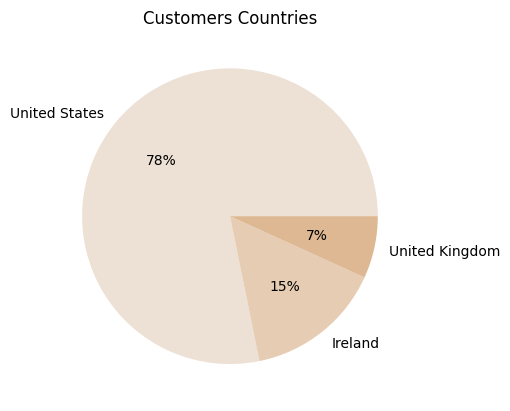

In [67]:
country = df_customer["country"].value_counts().reset_index().values.T
plt.pie(x=country[1], labels=country[0], autopct="%.0f%%", colors=viz_palette[:3])
plt.title("Customers Countries")

plt.savefig("customer countries.png", transparent=True, format="png", bbox_inches="tight", dpi=300)

More than 70% of our customers are from US.

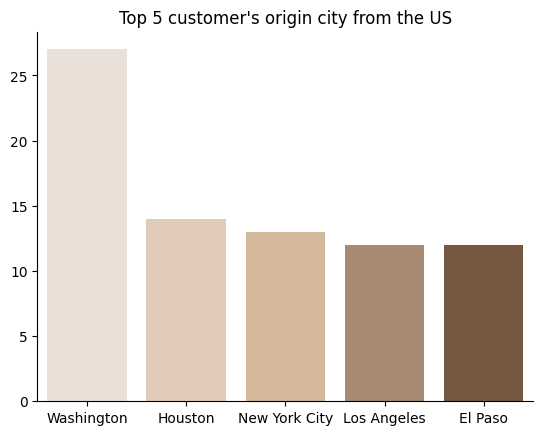

In [68]:
fig, ax = plt.subplots()
city_us = df_customer[df_customer["country"] == "United States"]["city"].value_counts()\
    .reset_index()\
    .sort_values(by="count", ascending=False)\
    .values[:5].T

sns.despine(fig=fig, right=True, top=True)
sns.barplot(x=city_us[0], y=city_us[1], palette=viz_palette[:5], hue=city_us[0], ax=ax)
plt.title("Top 5 customer's origin city from the US")
plt.show()
fig.savefig("top 5 customer cities.png", transparent=True, format="png", bbox_inches="tight", dpi=300)


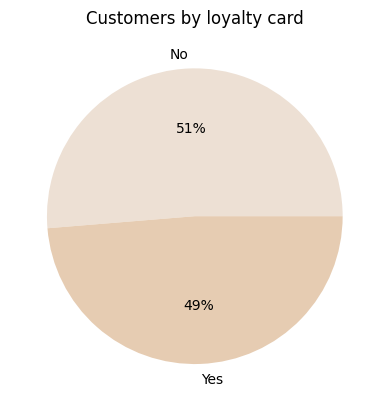

In [69]:
loyalty = df_customer["loyalty card"].value_counts().reset_index().values.T
plt.pie(x=loyalty[1], labels=loyalty[0], autopct="%.0f%%", colors=viz_palette[:2])
plt.title("Customers by loyalty card")

plt.savefig("customer loyalty card.png", transparent=True, format="png", bbox_inches="tight", dpi=300)


51% of our customers are not joining the loyalty program.

## Sales performance

In [70]:
# total revenue
revenues = {}
unit_sold = {}
profits = {}

for year in sorted(df_order["order year"].unique().tolist()):
    data = df_order[df_order["order year"] == year]
    # revenue
    revenue = data["total price"].sum()
    # unit sold
    q_sold = data["quantity"].sum()
    # profit    
    profit = data["total profit"].sum()
    
    revenues[year] = revenue
    unit_sold[year] = q_sold
    profits[year] = profit

total_revenues = round(sum(list(revenues.values())), 2)
total_unit_sold = sum(list(unit_sold.values()))
total_profit = round(sum(list(profits.values())), 2)
total_order = len(df_order["order id"])
revenue_per_order = total_revenues / total_order
profit_per_order = total_profit / total_order

print(f"Total order: {total_order}")
print(f"Total revenues from 2019 - 19 august 2022: USD {total_revenues}")
print(f"Total unit sold from 2019 - 19 august 2022: {total_unit_sold}")
print(f"Total profit from 2019 - 19 august 2022: USD {total_profit}")
print(f"revenue per order from 2019 - 19 aug 2022: USD {revenue_per_order}")
print(f"profit per order from 2019 - 19 aug 2022: USD {profit_per_order}")

Total order: 1000
Total revenues from 2019 - 19 august 2022: USD 45134.25
Total unit sold from 2019 - 19 august 2022: 3551
Total profit from 2019 - 19 august 2022: USD 4520.22
revenue per order from 2019 - 19 aug 2022: USD 45.13425
profit per order from 2019 - 19 aug 2022: USD 4.52022


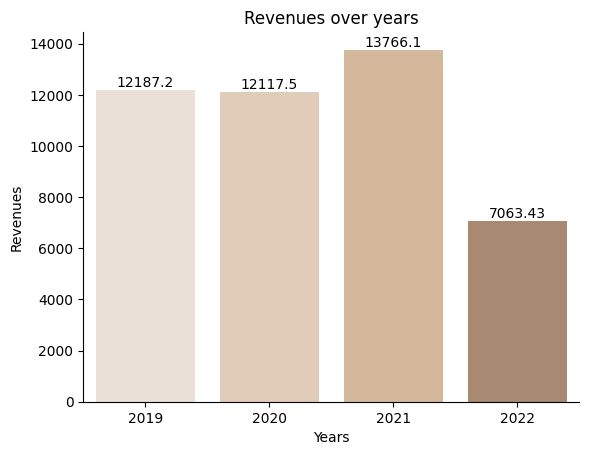

In [71]:
fig, ax = plt.subplots()
sns.despine(fig=fig, right=True, top=True)
sns.barplot(x=revenues.keys(), y=revenues.values(), hue=revenues.keys(), palette=viz_palette[:4], ax=ax)
ax.set_title("Revenues over years")
ax.set_xlabel("Years")
ax.set_ylabel("Revenues")

for i in ax.containers:
    ax.bar_label(i)

fig.savefig("revenue over year.png", transparent=True, format="png", bbox_inches="tight", dpi=300)

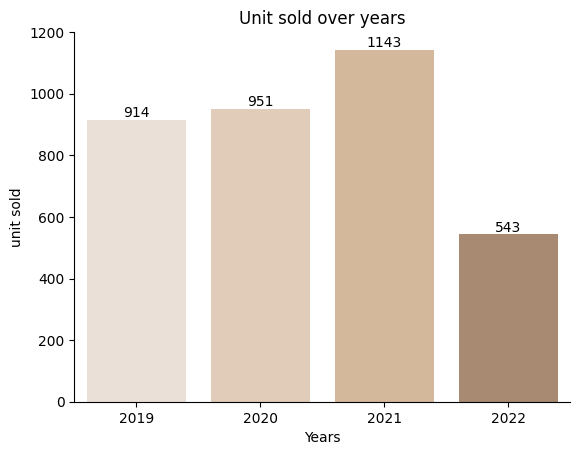

In [72]:
fig, ax = plt.subplots()
sns.despine(fig=fig, right=True, top=True)
sns.barplot(x=unit_sold.keys(), y=unit_sold.values(), hue=unit_sold.keys(), palette=viz_palette[:4], ax=ax)
ax.set_title("Unit sold over years")
ax.set_xlabel("Years")
ax.set_ylabel("unit sold")

for i in ax.containers:
    ax.bar_label(i)

fig.savefig("unit sold over year.png", transparent=True, format="png", bbox_inches="tight", dpi=300)

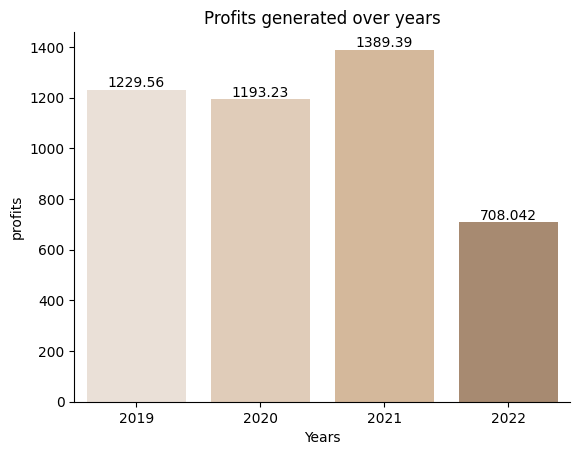

In [73]:
fig, ax = plt.subplots()
sns.despine(fig=fig, right=True, top=True)
sns.barplot(x=profits.keys(), y=profits.values(), hue=profits.keys(), palette=viz_palette[:4], ax=ax)
ax.set_title("Profits generated over years")
ax.set_xlabel("Years")
ax.set_ylabel("profits")

for i in ax.containers:
    ax.bar_label(i)

fig.savefig("net profit margin over year.png", transparent=True, format="png", bbox_inches="tight", dpi=300)

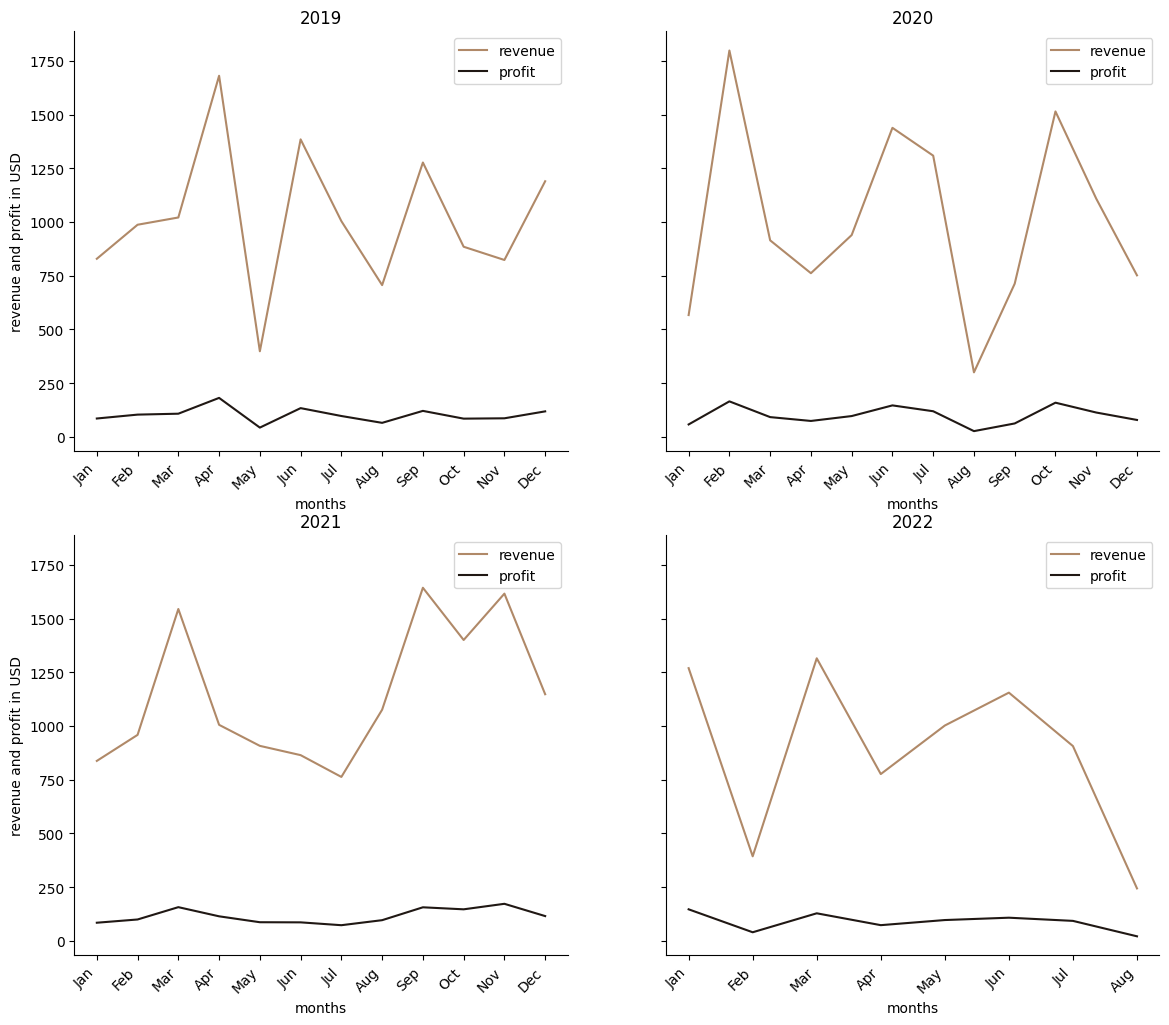

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
sns.despine(fig=fig, right=True, top=True)
for year, axes in zip(sorted(df_order["order year"].unique().tolist()), ax.ravel()):
    data = df_order[df_order["order year"] == year]
    
    sns.lineplot(data=data, x="order month", 
                 y="total price", estimator=np.sum, 
                 errorbar=None, label="revenue",
                 color=viz_palette[3], ax=axes)
    sns.lineplot(data=data, x="order month", 
                 y="total profit", estimator=np.sum, 
                 errorbar=None, label="profit",
                 color=viz_palette[-1], ax=axes)
    axes.set_title(str(year))
    plt.setp(axes.get_xticklabels(), rotation=45, ha='right')
    axes.set_xlabel("months")
    axes.set_ylabel("revenue and profit in USD")

fig.savefig("revenue profit trend.png", transparent=True, format="png", bbox_inches="tight", dpi=300)

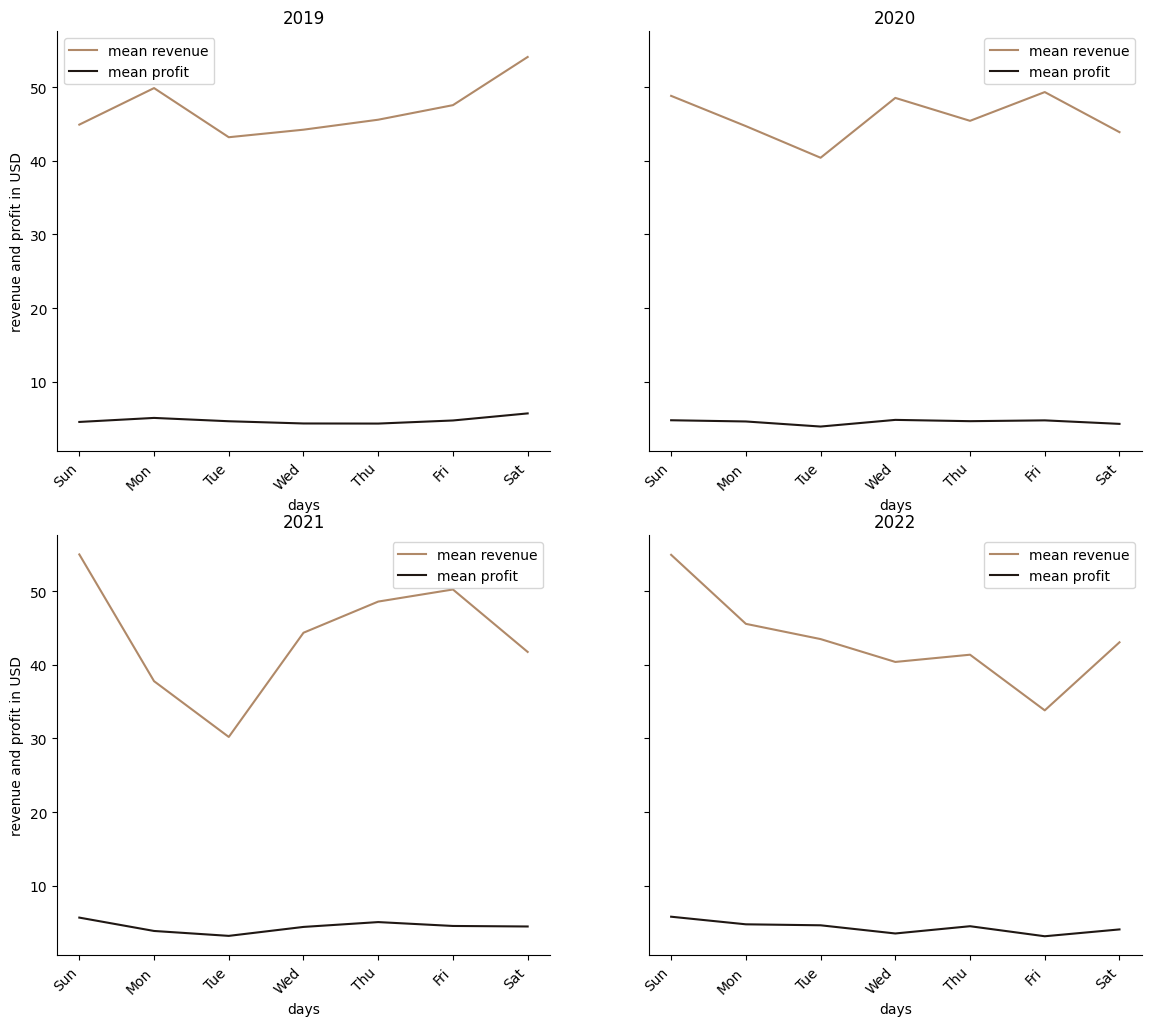

In [75]:
fig, ax = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
sns.despine(fig=fig, right=True, top=True)
for year, axes in zip(sorted(df_order["order year"].unique().tolist()), ax.ravel()):
    data = df_order[df_order["order year"] == year]
    
    sns.lineplot(data=data, x="order day", 
                 y="total price", estimator=np.mean, 
                 errorbar=None, label="mean revenue",
                 color=viz_palette[3], ax=axes)
    sns.lineplot(data=data, x="order day", 
                 y="total profit", estimator=np.mean, 
                 errorbar=None, label="mean profit",
                 color=viz_palette[-1], ax=axes)
    axes.set_title(str(year))
    plt.setp(axes.get_xticklabels(), rotation=45, ha='right')
    axes.set_xlabel("days")
    axes.set_ylabel("revenue and profit in USD")

fig.savefig("revenue profit trend (days).png", transparent=True, format="png", bbox_inches="tight", dpi=300)

sales performances slightly increase yearly

In [76]:
pivots = []
for year in sorted(df_order["order year"].unique().tolist()):
    data = df_order[df_order["order year"] == year]
    
    product_pivot = pd.pivot_table(data, values="quantity", 
                                   columns="roast type", index="coffee type",
                                   aggfunc="sum", fill_value=0)
    
    coffee_types = {"Ara": "Arabica", "Exc": "Excelsa", "Lib": "Liberica", "Rob": "Robusta"}
    for old_name, new_name in coffee_types.items():
        product_pivot.index = product_pivot.index.str.replace(old_name, new_name)

    roast_types = {"M":"Medium", "L":"Light", "D":"Dark"}
    for old_name, new_name in roast_types.items():
        product_pivot.columns = product_pivot.columns.str.replace(old_name, new_name)
    
    pivots.append(product_pivot)

## Product performance

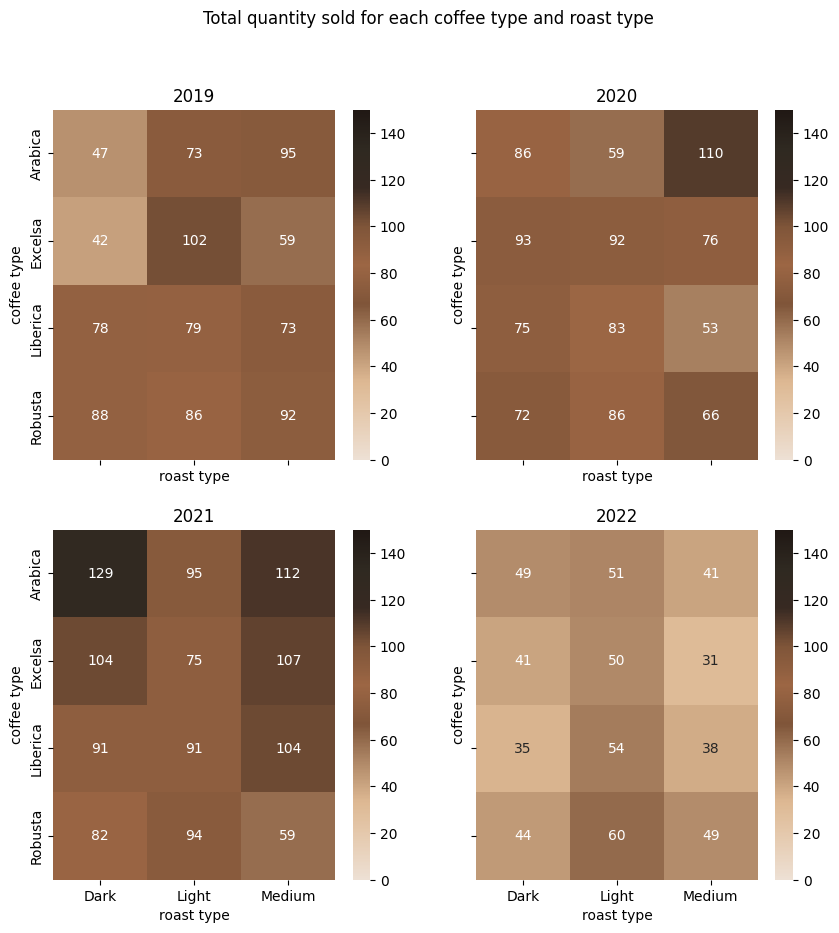

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

for year, axes, pivot in zip(sorted(df_order["order year"].unique().tolist()), ax.ravel(), pivots):
    sns.heatmap(pivot, cmap=cmap, fmt="d", annot=True, ax=axes, vmax=150, vmin=0)
    axes.set_title(f"{year}")

fig.suptitle("Total quantity sold for each coffee type and roast type")
fig.savefig("type viz.png", transparent=True, format="png", bbox_inches="tight", dpi=300)


In [78]:
# number of units sold for a product
product_performance = df_order.groupby("product id").agg({"quantity": "sum",
                                                          "total price": "sum",
                                                          "total profit": "sum"})\
    .reset_index()
    
def product_name(text):
    coffee = {"R": "Robusta",
              "L": "Liberica", 
              "A": "Arabica",
              "E": "Excelsa"}
    roast = {"L":"Light",
             "M":"Medium",
             "D":"Dark"}
    
    text = text.split("-")
    text_1 = coffee[text[0]] + " "
    text_2 = " " + roast[text[1]] + " Roasted "
    text_3 = text[2] + "Kg"
    
    return text_2 + text_1 + text_3

product_performance["product name"] = product_performance["product id"].map(product_name)

product_performance

,product id,quantity,total price,total profit,product name
0,A-D-0.2,97,289.545,26.05905,Dark Roasted Arabica 0.2Kg
1,A-D-0.5,89,531.330,47.81970,Dark Roasted Arabica 0.5Kg
2,A-D-1,49,487.550,43.87950,Dark Roasted Arabica 1Kg
3,A-D-2.5,76,1739.260,156.53340,Dark Roasted Arabica 2.5Kg
4,A-L-0.2,50,194.250,17.48250,Light Roasted Arabica 0.2Kg
5,A-L-0.5,70,543.900,48.95100,Light Roasted Arabica 0.5Kg
6,A-L-1,72,932.400,83.91600,Light Roasted Arabica 1Kg
7,A-L-2.5,86,2561.510,230.53590,Light Roasted Arabica 2.5Kg
8,A-M-0.2,65,219.375,19.74375,Medium Roasted Arabica 0.2Kg
9,A-M-0.5,99,668.250,60.14250,Medium Roasted Arabica 0.5Kg


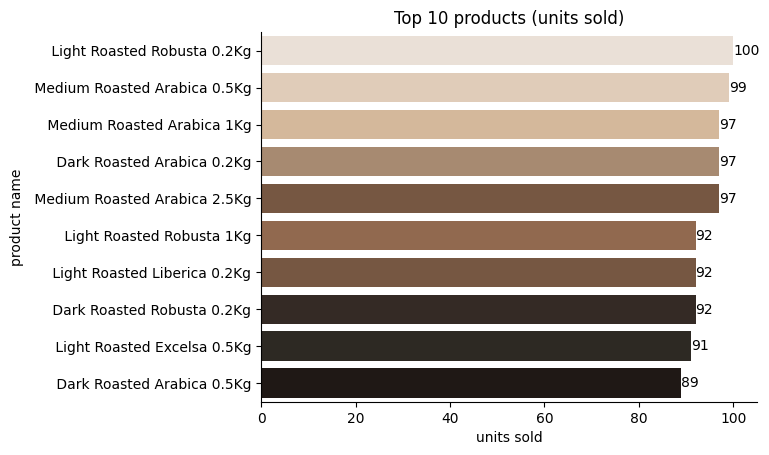

In [79]:
# top 10 product
fig, ax = plt.subplots()
sns.barplot(product_performance.sort_values("quantity", ascending=False)[:10], 
            y="product name", 
            x="quantity", ax=ax, 
            hue="product name", palette=viz_palette[:10])
sns.despine(fig=fig)

ax.set_title("Top 10 products (units sold)")
ax.set_xlabel("units sold")

for i in ax.containers:
    ax.bar_label(i, label_type="edge")

fig.savefig("overall top 10 products by quantity.png", transparent=True, format="png", bbox_inches="tight", dpi=300)


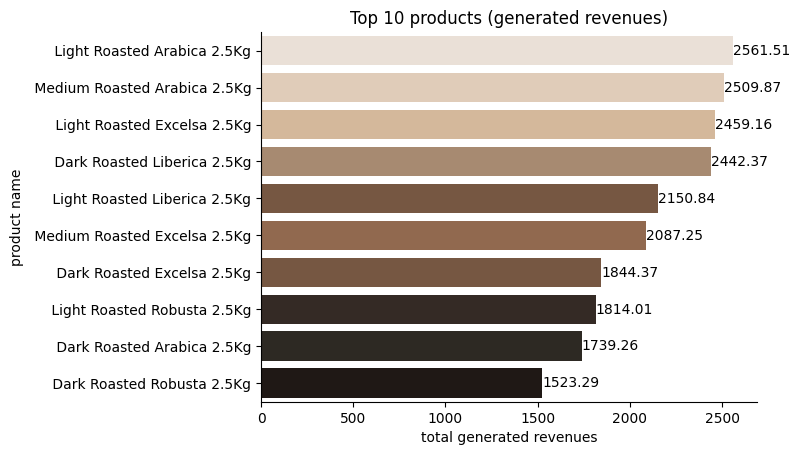

In [80]:
# top 10 product
fig, ax = plt.subplots()
sns.barplot(product_performance.sort_values("total price", ascending=False)[:10], 
            y="product name", 
            x="total price", ax=ax, 
            hue="product name", palette=viz_palette[:10])
sns.despine(fig=fig)

ax.set_title("Top 10 products (generated revenues)")
ax.set_xlabel("total generated revenues")

for i in ax.containers:
    ax.bar_label(i, label_type="edge")

fig.savefig("overall top 10 products by revenue.png", transparent=True, format="png", bbox_inches="tight", dpi=300)


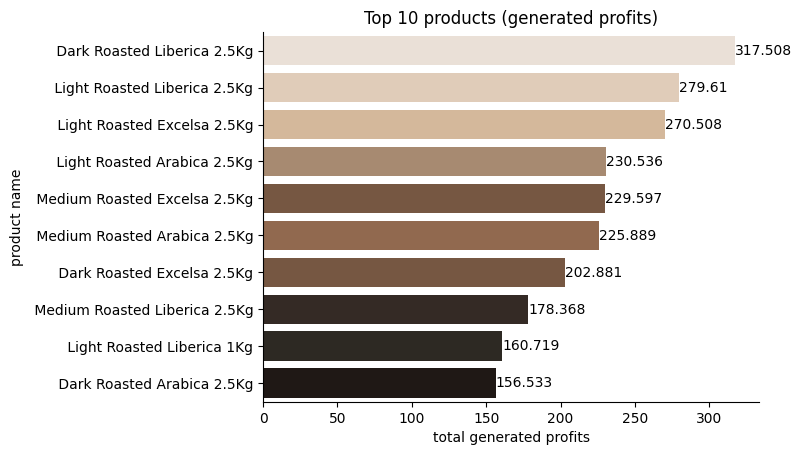

In [81]:
# top 10 product
fig, ax = plt.subplots()
sns.barplot(product_performance.sort_values("total profit", ascending=False)[:10], 
            y="product name", 
            x="total profit", ax=ax, 
            hue="product name", palette=viz_palette[:10])
sns.despine(fig=fig)

ax.set_title("Top 10 products (generated profits)")
ax.set_xlabel("total generated profits")

for i in ax.containers:
    ax.bar_label(i, label_type="edge")

fig.savefig("overall top 10 products by profit.png", transparent=True, format="png", bbox_inches="tight", dpi=300)


<b>Dominant Coffee Type</b>: Arabica consistently dominates the sales across all years and roast types.
<b>Preferred Roast Type</b>: Medium roast appears to be the most popular choice overall, followed by dark roast.

1. Arabica: 
>> * Dark roast Arabica saw a significant drop in sales from 2019 to 2020. 
>> * Light roast Arabica maintained relatively stable sales throughout the years. 
2. Excelsa: 
>> * Excelsa sales were minimal compared to Arabica and Robusta. 
>> * Light and medium roasts of Excelsa saw a slight increase in sales from 2019 to 2020.
3. Liberica: 
>> * Liberica sales were also relatively low. 
>> * Dark roast Liberica experienced a slight decline in sales from 2019 to 2022. 
4. Robusta: 
>> * Robusta sales were consistently lower than Arabica. 
>> * Dark roast Robusta saw a significant drop in sales from 2019 to 2020.




## Customer analysis

cohort analysis


In [82]:
class CohortAnalysis():
    def __init__(self, df, year, date_col, cohort_col, cohort_name, id_col):
        """
        df: pandas dataframe
        year (int): year you want to filter
        date_col (str): date column name in your df
        cohort_col : cohort column
        cohort_name : cohort name
        id_col : customer id column
        """
        self.df = df
        self.year = year
        self.date_col = date_col
        self.cohort_col = cohort_col
        self.cohort_name = cohort_name
        self.id_col = id_col
    
    def simplify_data(self):
        if len(self.cohort_col) > 1:
            df = self.df[[self.date_col, self.id_col, self.cohort_col]].copy()
        else:
            df = self.df[[self.date_col, self.id_col]].copy()
        return df
    
    def get_year_and_month(self):
        df = self.simplify_data()
        df['invoice_year'] = df[self.date_col].dt.year
        df['invoice_month'] = df[self.date_col].dt.month
        return df
    
    def filter_data(self):
        try:
            df = self.get_year_and_month()
            if len(self.cohort_col) > 0:
                df = df[(df['invoice_year'] == self.year) & 
                        (df[self.cohort_col] == self.cohort_name)]
            else:
                df = df[df['invoice_year'] == self.year]
            return df
        except KeyError:
            print(f"{self.cohort_col} not found in your data")
    
    def get_first_invoice_month(self):
        df = self.filter_data()
        cohort = df.groupby(self.id_col)['invoice_month'].min().reset_index()
        cohort.columns = [self.id_col, 'first_invoice_month']
        df = df.merge(cohort, on=self.id_col, how='left')
        return df
    
    def get_month_diff(self):
        df = self.get_first_invoice_month()
        df['month_diff'] = df.apply(lambda row : row['invoice_month'] - row['first_invoice_month']
                                    if np.isfinite(row['invoice_month']) and np.isfinite(row['first_invoice_month'])
                                    else np.nan, axis=1)
        return df
    
    def check_and_pivot(self):
        df_new = self.get_month_diff()

        # month without any transaction
        exclude_first = [i for i in range(1, 13) if i not in df_new.first_invoice_month.unique()]
        exclude_diff = [i for i in range(0, 12) if i not in df_new.month_diff.unique()]

        # check if there is any month without transaction
        if len(exclude_first) > 0 or len(exclude_diff) > 0:
            new_df = df_new.copy()

            # make fake data
            for i in exclude_first:
                x = {f'{self.date_col}': f'{self.year}-{i}-{i}',
                    self.id_col:'abc',
                    'invoice_year': self.year,
                    'invoice_month': i,
                    'first_invoice_month':i,
                    'month_diff': 0}
                x = pd.DataFrame(x, index=[0])
                new_df = pd.concat([new_df, x], ignore_index=True)

            for i in exclude_diff:
                x = {f'{self.date_col}': f'self.year-{i}-{i}',
                    self.id_col:'abc',
                    'invoice_year': self.year,
                    'invoice_month': 12,
                    'first_invoice_month':1,
                    'month_diff': i}
                x = pd.DataFrame(x, index=[0])
                new_df = pd.concat([new_df, x], ignore_index=True)

            pivot = pd.pivot_table(new_df,
                                   index='first_invoice_month',
                                   columns='month_diff',
                                   values=self.id_col,
                                   aggfunc=pd.Series.nunique)

            headers = [i for i in range(1, 13)]

            months = ['Jan', 'Feb', 'Mar',
                      'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep',
                      'Oct', 'Nov', 'Dec']

            months = {headers[i]: months[i] for i in range(len(headers))}

            # replace fake data with 0.0 in pivot table
            for i in exclude_first:
                pivot[0][i] = 0.0

            for i in exclude_diff:
                pivot[i][1] = 0.0

            pivot = pivot.rename(index=months)
            pivot.index.name = 'First Invoice Month'
            pivot.columns.name = 'Repeat Order After (month)'

            pivot = pivot.div(pivot[0], axis=0)
            pivot = pivot.fillna(0.0)
            pivot = pivot.round(3)
            return pivot

        else:
            pivot = pd.pivot_table(df_new,
                                   index='first_invoice_month',
                                   columns='month_diff',
                                   values=self.id_col,
                                   aggfunc=pd.Series.nunique)

            headers = [i for i in range(1, 13)]

            months = ['Jan', 'Feb', 'Mar',
                      'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep',
                      'Oct', 'Nov', 'Dec']

            months = {headers[i]: months[i] for i in range(len(headers))}

            pivot = pivot.rename(index=months)
            pivot.index.name = 'First Invoice Month'
            pivot.columns.name = 'Repeat Order After (month)'

            pivot = pivot.div(pivot[0], axis=0)
            pivot = pivot.fillna(0.0)
            pivot = pivot.round(3)
            return pivot
    
    def visualize(self, color=cmap, figsize=(12, 10)):
        pivot = self.check_and_pivot()
        fig, axes = plt.subplots(1, 1, figsize=figsize)
        fig.set_dpi = 300
        sns.heatmap(pivot, cmap=color, annot=True,
                    ax=axes, fmt='.0%')

        axes.set_xlabel("Repeat Order After (Month)", weight='bold')
        axes.set_ylabel("First Invoice Month", weight='bold')
        axes.set_title(f"{self.cohort_name} Sales Cohort")
        axes.set_yticklabels(axes.get_yticklabels(), rotation=360)

        fig.savefig(os.path.join(os.getcwd(),
                f"{self.cohort_name} Sales Cohort.png"),
                    bbox_inches='tight', dpi=fig.dpi,
                    transparent=True)
    
    def execute(self):
        self.check_and_pivot()
        self.visualize()

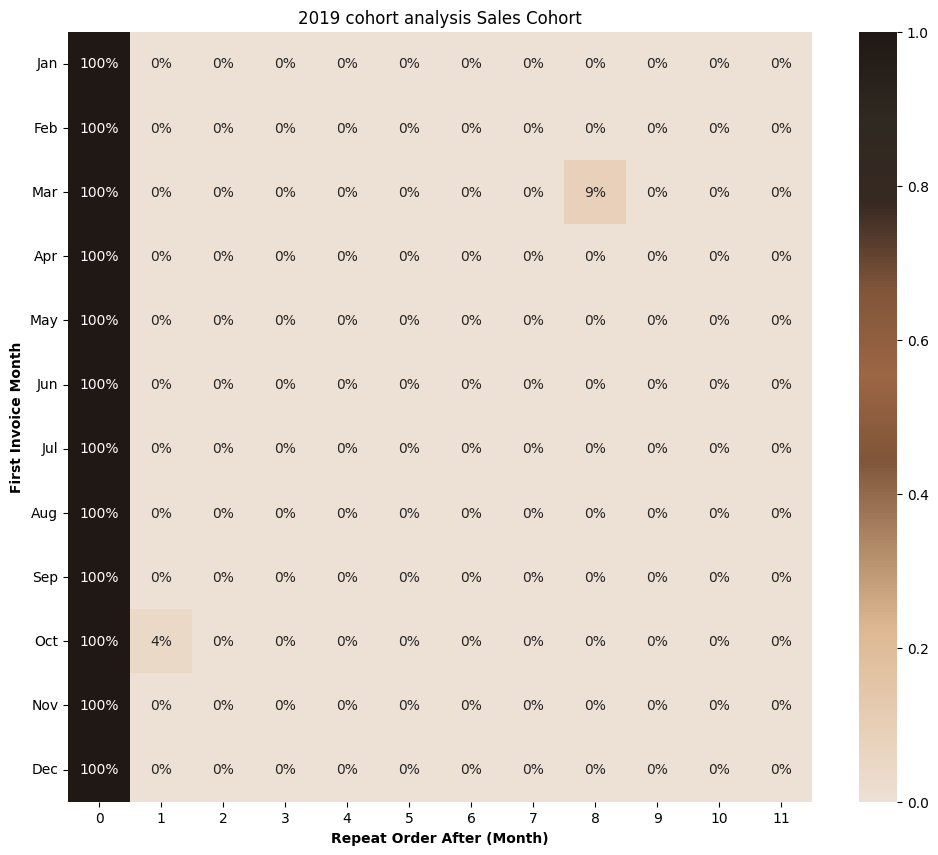

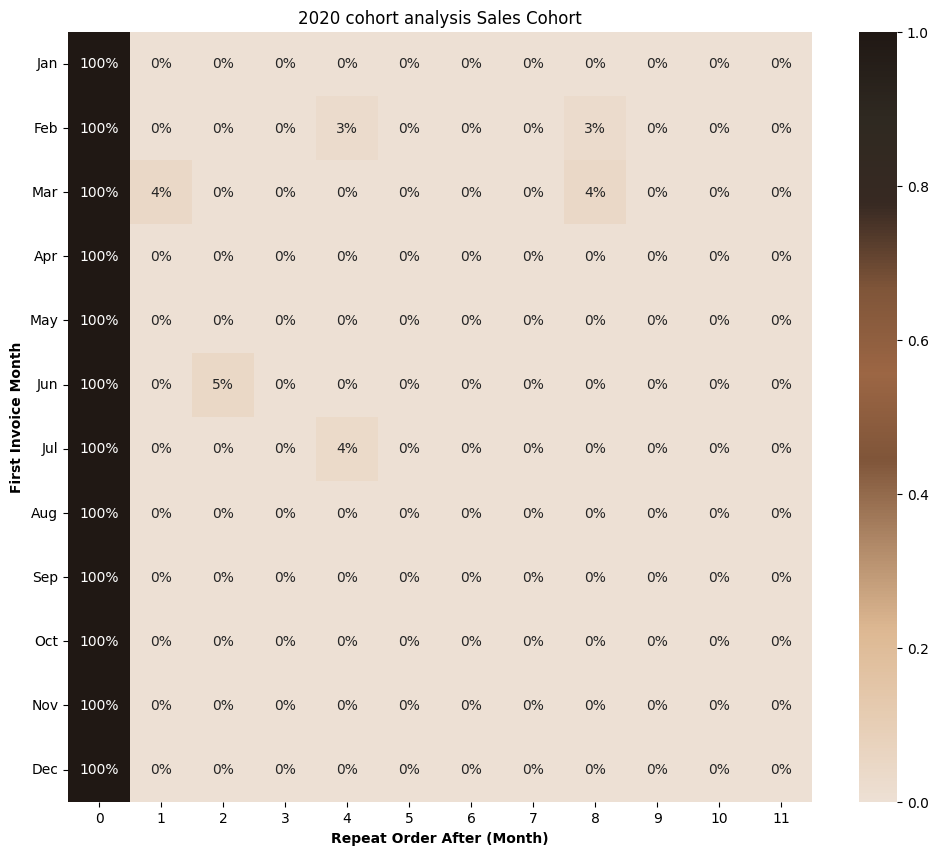

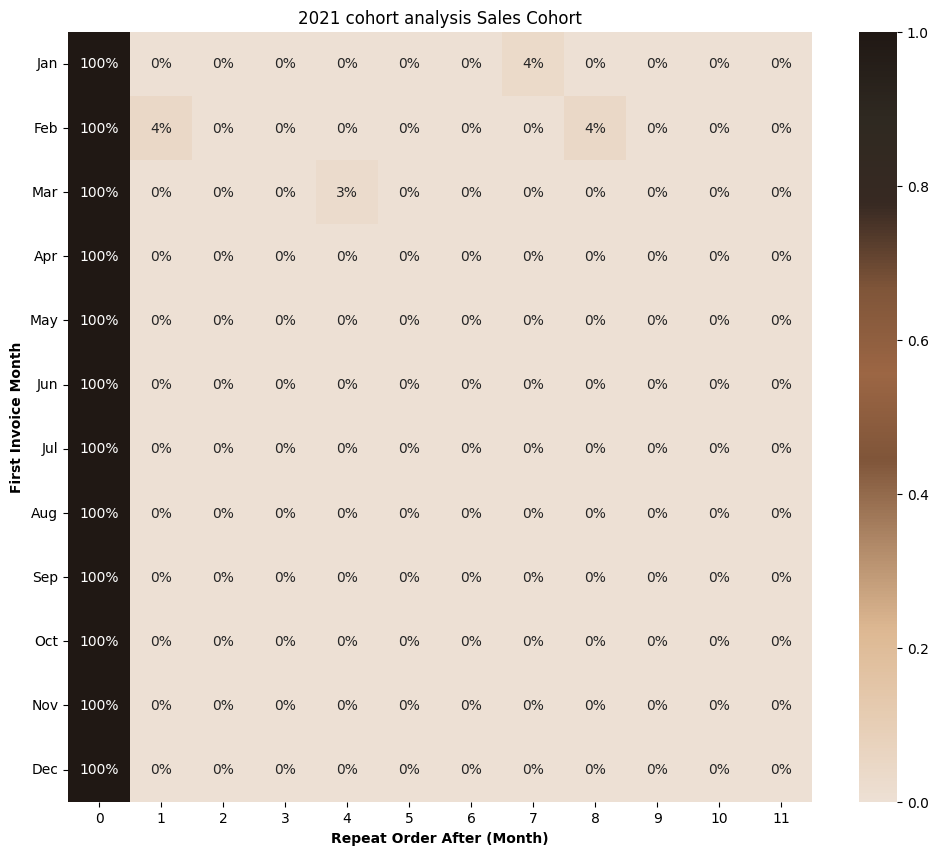

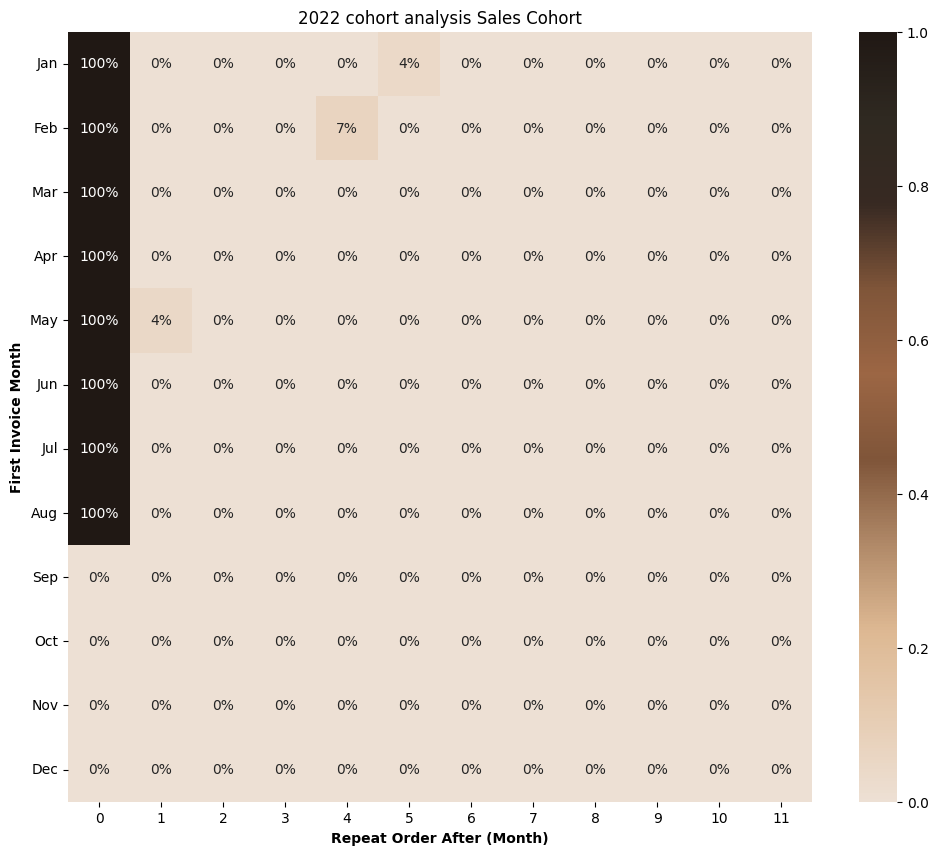

In [83]:
cohorts = {}
for year in sorted(df_order["order year"].unique().tolist()):
    cohort_obj = CohortAnalysis(df=df_order, year=int(year), 
                                date_col="order date", cohort_col="", 
                                cohort_name=f"{year} cohort analysis", id_col="customer id")
    cohort = cohort_obj.execute()
    cohorts[year] = cohort


Based on the cohort analysis, the business has a very low customer retention

In [84]:
df_cluster_num = df_order.groupby("customer id").agg({"order id": lambda x: len(x),
                                                      "order date": lambda x: (x.max() - x.min()).days,
                                                      "quantity": lambda x: x.sum(),
                                                      "total price": lambda x: x.sum(),
                                                      "size kg": lambda x: x.mean()}).reset_index()
df_cluster_num


,customer id,order id,order date,quantity,total price,size kg
0,00246-15080-LE,1,0,6,178.710,2.50
1,00256-19905-YG,1,0,6,40.500,0.50
2,00445-42781-KX,4,0,16,163.720,0.85
3,00539-42510-RY,1,0,5,148.925,2.50
4,00852-54571-WP,1,0,2,8.250,0.20
...,...,...,...,...,...,...
908,99643-51048-IQ,1,0,6,20.250,0.20
909,99735-44927-OL,1,0,3,41.250,1.00
910,99869-55718-UU,1,0,4,10.740,0.20
911,99899-54612-NX,1,0,2,66.930,2.50


In [85]:
df_cluster_cat = df_order[["country", "loyalty card", "coffee type", "roast type"]]
cluster_dummy = pd.get_dummies(df_cluster_cat, prefix="", prefix_sep="")
df_cluster_cat = pd.concat([df_order[["customer id"]], cluster_dummy], axis=1)
df_cluster_cat = df_cluster_cat.groupby("customer id").agg({"Ireland": lambda x: x.max(),
                                                            "United Kingdom": lambda x: x.max(),
                                                            "United States": lambda x: x.max(),
                                                            "No": lambda x: x.max(),
                                                            "Yes": lambda x: x.max(),
                                                            "Ara": lambda x: x.sum(),
                                                            "Exc": lambda x: x.sum(),
                                                            "Lib": lambda x: x.sum(),
                                                            "Rob": lambda x: x.sum(),
                                                            "D": lambda x: x.sum(),
                                                            "L": lambda x: x.sum(),
                                                            "M": lambda x: x.sum()}).reset_index()
df_cluster_cat


,customer id,Ireland,United Kingdom,United States,No,Yes,Ara,Exc,Lib,Rob,D,L,M
0,00246-15080-LE,False,False,True,True,False,0,0,1,0,1,0,0
1,00256-19905-YG,True,False,False,True,False,1,0,0,0,0,0,1
2,00445-42781-KX,True,False,False,False,True,1,1,1,1,3,1,0
3,00539-42510-RY,True,False,False,False,True,0,0,1,0,1,0,0
4,00852-54571-WP,False,False,True,False,True,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,99643-51048-IQ,False,False,True,True,False,1,0,0,0,0,0,1
909,99735-44927-OL,False,False,True,False,True,0,1,0,0,0,0,1
910,99869-55718-UU,False,True,False,False,True,0,0,0,1,1,0,0
911,99899-54612-NX,False,False,True,True,False,0,0,1,0,0,0,1


In [86]:
df_cluster = df_cluster_cat.merge(df_cluster_num, on="customer id", how="left")
for old_name, new_name in zip(["order id", "order date", "total price"], ["freq", "active (days)", "monetary"]):
    df_cluster.columns = df_cluster.columns.str.replace(old_name, new_name)
df_cluster = df_cluster.set_index("customer id")
df_cluster


,Ireland,United Kingdom,United States,No,Yes,Ara,Exc,Lib,Rob,D,L,M,freq,active (days),quantity,monetary,size kg
customer id,,,,,,,,,,,,,,,,,
00246-15080-LE,False,False,True,True,False,0,0,1,0,1,0,0,1,0,6,178.710,2.50
00256-19905-YG,True,False,False,True,False,1,0,0,0,0,0,1,1,0,6,40.500,0.50
00445-42781-KX,True,False,False,False,True,1,1,1,1,3,1,0,4,0,16,163.720,0.85
00539-42510-RY,True,False,False,False,True,0,0,1,0,1,0,0,1,0,5,148.925,2.50
00852-54571-WP,False,False,True,False,True,0,1,0,0,0,0,1,1,0,2,8.250,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99643-51048-IQ,False,False,True,True,False,1,0,0,0,0,0,1,1,0,6,20.250,0.20
99735-44927-OL,False,False,True,False,True,0,1,0,0,0,0,1,1,0,3,41.250,1.00
99869-55718-UU,False,True,False,False,True,0,0,0,1,1,0,0,1,0,4,10.740,0.20


In [87]:
repeat_rate = round(df_cluster[df_cluster["freq"] > 1].shape[0] / df_cluster.shape[0], 2)
churn_rate = 1 - repeat_rate

print(f"repeat rate: {repeat_rate}")
print(f"churn rate: {churn_rate}")


repeat rate: 0.06
churn rate: 0.94


In [88]:
X = df_cluster.values
inertias = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, init="k-means++", random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)


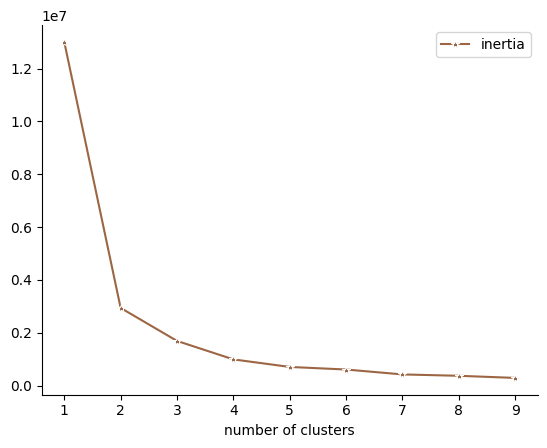

In [89]:
fig, ax = plt.subplots()
sns.lineplot(x=range(1, 10), y=inertias, marker="*", label="inertia", ax=ax, color=viz_palette[5])
ax.set_xlabel("number of clusters")
sns.despine(fig=fig)
fig.savefig("inertia plot.png", transparent=True, dpi=300, bbox_inches="tight")


elbow = 3

In [90]:
segmentation_model = KMeans(n_clusters=3, init="k-means++", random_state=42)
segmentation_model.fit(X)


KMeans(n_clusters=3, random_state=42)

In [91]:
labels = segmentation_model.labels_
df_cluster["segment"] = labels

def modify_segment(x):
    if x == 0:
        return "low-value"
    elif x==1:
        return "high-value"
    elif x==2:
        return "moderate-value"

df_cluster["segment"] = df_cluster["segment"].map(modify_segment)

df_cluster.head()


,Ireland,United Kingdom,United States,No,Yes,Ara,Exc,Lib,Rob,D,L,M,freq,active (days),quantity,monetary,size kg,segment
customer id,,,,,,,,,,,,,,,,,,
00246-15080-LE,False,False,True,True,False,0,0,1,0,1,0,0,1,0,6,178.710,2.50,moderate-value
00256-19905-YG,True,False,False,True,False,1,0,0,0,0,0,1,1,0,6,40.500,0.50,low-value
00445-42781-KX,True,False,False,False,True,1,1,1,1,3,1,0,4,0,16,163.720,0.85,moderate-value
00539-42510-RY,True,False,False,False,True,0,0,1,0,1,0,0,1,0,5,148.925,2.50,moderate-value
00852-54571-WP,False,False,True,False,True,0,1,0,0,0,0,1,1,0,2,8.250,0.20,low-value


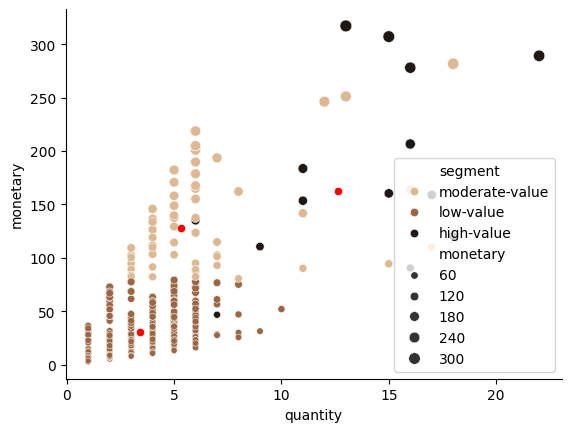

In [92]:
centroids = segmentation_model.cluster_centers_
fig, ax = plt.subplots()
palette = [viz_palette[2], viz_palette[5], viz_palette[-1]]
sns.scatterplot(df_cluster, x="quantity", y="monetary", hue="segment", size="monetary", palette=palette, ax=ax)
sns.scatterplot(x=centroids[:, -3], y=centroids[:, -2], color="r", ax=ax)
sns.despine(fig=fig)

fig.savefig("quantity vs monetary per segment.png", transparent=True, dpi=300, bbox_inches="tight")

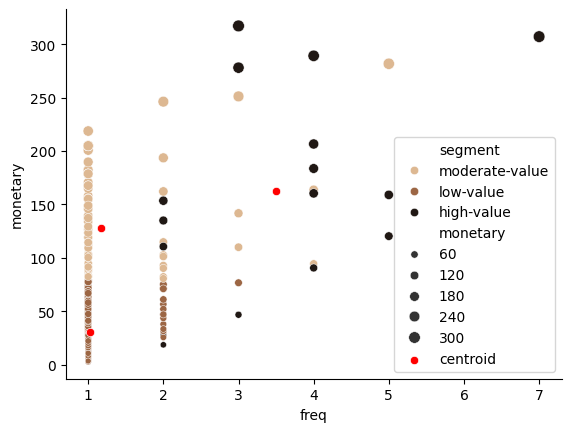

In [93]:
fig, ax = plt.subplots()
sns.scatterplot(df_cluster, x="freq", y="monetary", hue="segment", size="monetary", palette=palette, ax=ax)
sns.scatterplot(x=centroids[:, -5], y=centroids[:, -2], color="r", ax=ax, label="centroid")
sns.despine(fig=fig)

fig.savefig("transaction freq vs monetary per segment.png", transparent=True, dpi=300, bbox_inches="tight")

The charts show a potential for improving customer value. low value customers to moderate value, and moderate value to high value customers. Indicated by an overlapping between segments. But to do that we need to know the characteristics of the customers in each segment (cluster).

In [94]:
df_cluster = df_cluster.reset_index()
df_cluster = df_cluster.drop(columns=["Ireland", "United Kingdom", "United States", "Yes", "No"])

new_df_cluster = df_customer[["customer id", "country", "loyalty card"]].merge(df_cluster, on="customer id", how="right")
new_df_cluster


,customer id,country,loyalty card,Ara,Exc,Lib,Rob,D,L,M,freq,active (days),quantity,monetary,size kg,segment
0,00246-15080-LE,United States,No,0,0,1,0,1,0,0,1,0,6,178.710,2.50,moderate-value
1,00256-19905-YG,Ireland,No,1,0,0,0,0,0,1,1,0,6,40.500,0.50,low-value
2,00445-42781-KX,Ireland,Yes,1,1,1,1,3,1,0,4,0,16,163.720,0.85,moderate-value
3,00539-42510-RY,Ireland,Yes,0,0,1,0,1,0,0,1,0,5,148.925,2.50,moderate-value
4,00852-54571-WP,United States,Yes,0,1,0,0,0,0,1,1,0,2,8.250,0.20,low-value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,99643-51048-IQ,United States,No,1,0,0,0,0,0,1,1,0,6,20.250,0.20,low-value
909,99735-44927-OL,United States,Yes,0,1,0,0,0,0,1,1,0,3,41.250,1.00,low-value
910,99869-55718-UU,United Kingdom,Yes,0,0,0,1,1,0,0,1,0,4,10.740,0.20,low-value
911,99899-54612-NX,United States,No,0,0,1,0,0,0,1,1,0,2,66.930,2.50,low-value


In [95]:
cluster_group = new_df_cluster.groupby("segment")[new_df_cluster.columns[-6:-2]].mean().round(1)
cluster_group.columns = ["mean freq", "mean active (days)", "mean quantity", "mean monetary"]


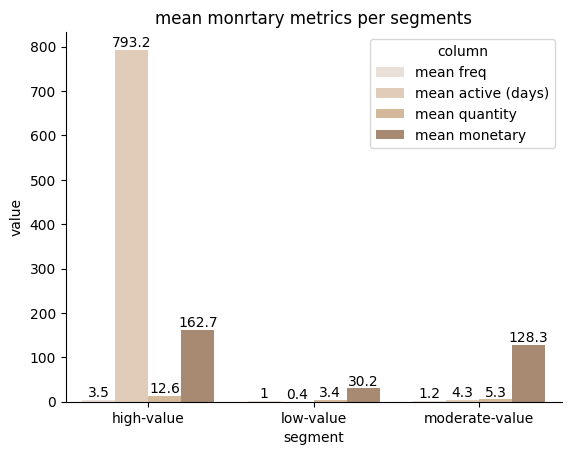

In [96]:
cluster_group_melt = cluster_group.melt(ignore_index=False, var_name="column", value_name="value")

fig, ax = plt.subplots()
sns.barplot(x='segment', y='value', hue='column', data=cluster_group_melt, palette=viz_palette[:4])
for i in ax.containers:
    ax.bar_label(i)
ax.set_title("mean monrtary metrics per segments")
sns.despine(fig=fig)

fig.savefig("mean monetary metrics per segment.png", transparent=True, dpi=300, bbox_inches="tight")

High-value segment (cluster 1):

* has the highest values for all metrics, indicating that these customers are highly active, purchase frequently, and spend significantly more on average compared to other segments.
* This segment is likely the most profitable for the business and should be prioritized for retention and upselling efforts.

moderate-value segment (cluster 2):

* This segment falls between the high-value and low-value segments in terms of their metrics. 
* The business might want to focus on cross-selling to these customers to move them towards the high-value segment.

low-value segment (cluster 0):

* This segment shows the lowest values across all metrics. These customers are less active, purchase less frequently, and spend significantly less on average.
* The business might want to focus on reactivating these customers or targeting them with specific promotions or offers to increase their engagement and spending.



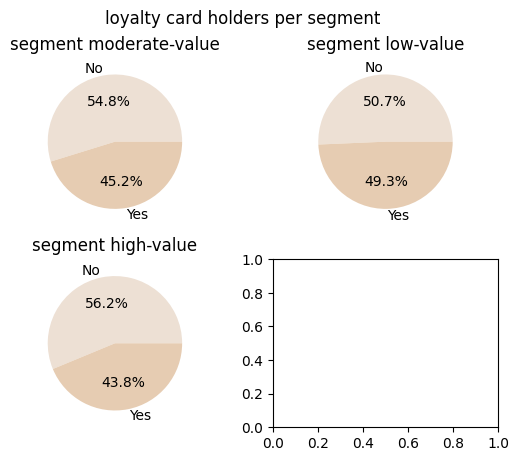

In [97]:
fig, ax = plt.subplots(2, 2)

for segment, axes in zip(new_df_cluster["segment"].unique(), ax.ravel()):
    data = new_df_cluster[new_df_cluster["segment"] == segment]["loyalty card"]
    data = data.value_counts().reset_index().values.T
    axes.pie(x=data[1], labels=data[0], colors=viz_palette[:2], autopct="%.1f%%")
    axes.set_title(f"segment {segment}")
fig.suptitle("loyalty card holders per segment")

fig.savefig("loyalty card per segment.png", transparent=True, dpi=300, bbox_inches="tight")

More than 50% of customers in moderate and high value don’t have loyalty card.

The business needs to encourage the customers to join the loyalty program through several strategies:
1. Discount for who has a loyalty card.
2. Leverage customer testimonials using banners inside the store or by posting content in social media.
3. Implementing referral program.


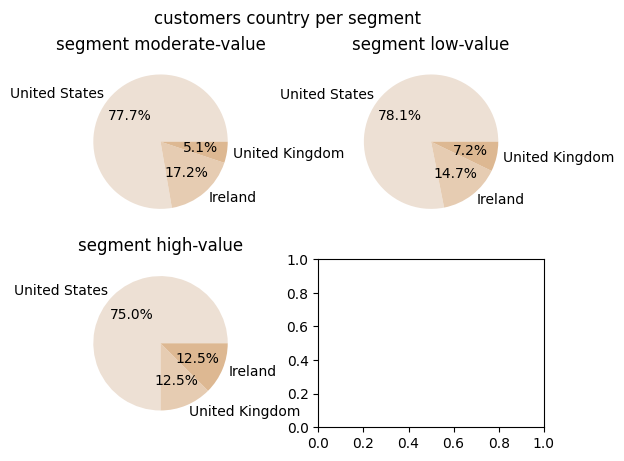

In [98]:
fig, ax = plt.subplots(2, 2)

for segment, axes in zip(new_df_cluster["segment"].unique(), ax.ravel()):
    data = new_df_cluster[new_df_cluster["segment"] == segment]["country"]
    data = data.value_counts().reset_index().values.T
    axes.pie(x=data[1], labels=data[0], colors=viz_palette[:3], autopct="%.1f%%")
    axes.set_title(f"segment {segment}")
fig.suptitle("customers country per segment")

fig.savefig("country per segment.png", transparent=True, dpi=300, bbox_inches="tight")

In [99]:
group_coffee = new_df_cluster.groupby("segment")[["Ara", "Lib", "Exc", "Rob"]].mean().round(1)
group_coffee.columns = ["mean "+i for i in group_coffee.columns]
coffee_melt = group_coffee.melt(value_name="value", var_name="column", ignore_index=False)


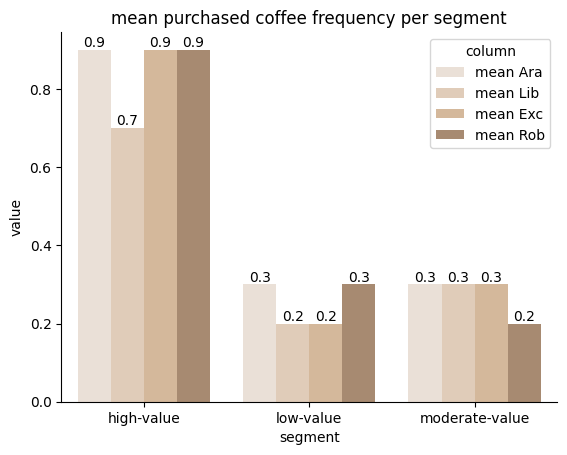

In [100]:
fig, ax = plt.subplots()
sns.barplot(x='segment', y='value', hue='column', data=coffee_melt, palette=viz_palette[:4], ax=ax)
for i in ax.containers:
    ax.bar_label(i)

ax.set_title("mean purchased coffee frequency per segment")
sns.despine(fig=fig)
fig.savefig("coffee type per segment.png", transparent=True, dpi=300, bbox_inches="tight")

* Arabica coffee is strongly preferred across all segments especially high value customers. 
* Liberica coffee is least preferred except moderate value customer. 
* Excelsa coffee is strongly preferred by customers except low value customers.
* Robusta coffee is strongly preferred by customers except moderate value customers.


In [101]:
group_roast = new_df_cluster.groupby("segment")[["L", "M", "D"]].mean().round(1)
group_roast.columns = ["mean " + i for i in group_roast.columns]
roast_melted = group_roast.melt(ignore_index=False, var_name='column', value_name='value')


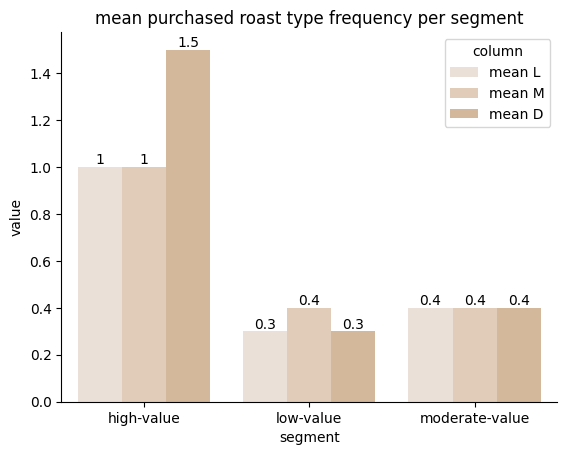

In [102]:
fig, ax = plt.subplots()
sns.barplot(x='segment', y='value', hue='column', data=roast_melted, palette=viz_palette[:3], ax=ax)
for i in ax.containers:
    ax.bar_label(i)

ax.set_title("mean purchased roast type frequency per segment")
sns.despine(fig=fig)
fig.savefig("roast type per segment.png", transparent=True, dpi=300, bbox_inches="tight")

* Dark roasted coffee consistently popular across all segments.
* Medium roasted coffee broad appeal with steady performance.
* Light roasted coffee is least preferred among by high and low value segments.


## Recommendations
1. <b>Raise retention</b>: by encouraging the customers to join loyalty program.
2. <b>Apply tailored marketing</b>: Customize marketing content based on the characteristics of each segment.
3. <b>Raise customer value</b>By applying cross selling strategy especially for moderate-value customers to raise the potential improvement to be high-value customers.
4. <b>Reactivate churned customers</b>: Through promotions and offers to raise their engagement, spending, and active days.
5. <b>Reach more customers</b>: Consider partnership with influencers or joining events to introduce products to reach more customers.
6. <b>CRM</b>: Build a better relationship with customers using all channels.